In [2]:
ls

backprojection.py  featuresign.py    rescale.py        sample_patches.py
config_run.py      log/              rnd_smp_patch.py  scratch/
data/              output/           run_debug.ipynb   ScSR.py
demo/              patch_pruning.py  run.py
dict_train.py      __pycache__/      run_sbatch.sh


In [3]:
pwd

'/scratch_net/kringel/hchoong/github/quantum-cv/ScSR'

In [1]:
import numpy as np 
from os import listdir, mkdir
from os.path import isdir
from skimage.io import imread, imsave
from skimage.color import rgb2ycbcr, ycbcr2rgb
from skimage.transform import resize
#from scipy.misc import imresize
from tqdm import tqdm
import pickle
from ScSR import ScSR
from backprojection import backprojection
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import normalize

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import sys

print(os.path.dirname(sys.executable))

/scratch_net/kringel/hchoong/conda_envs/quantum_cv2/bin


# Visualization

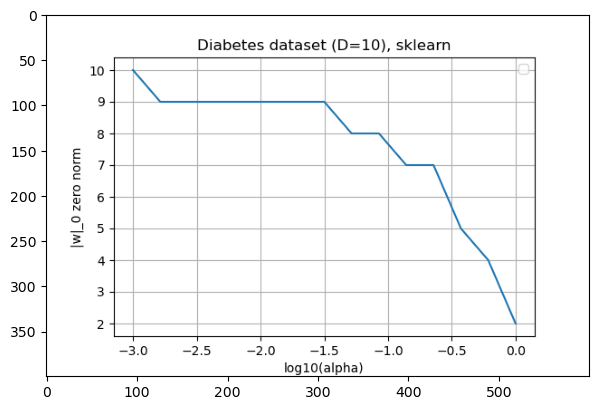

In [18]:
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/numerics/lasso_f1.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

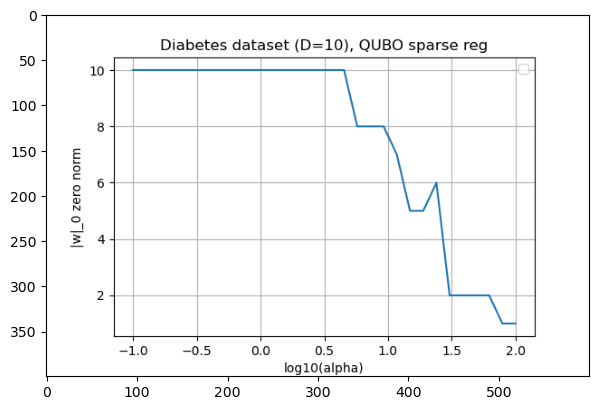

In [19]:
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/numerics/lasso_f2.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

In [5]:
img_path = '/Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/baby.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/baby.png'

In [6]:
import numpy as np 
from rnd_smp_patch import rnd_smp_patch
from patch_pruning import patch_pruning
from spams import trainDL
import pickle

ModuleNotFoundError: No module named 'spams'

In [8]:
ls -a /Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/HR

./          000000.png  000002.png  000004.png
../         000001.png  000003.png


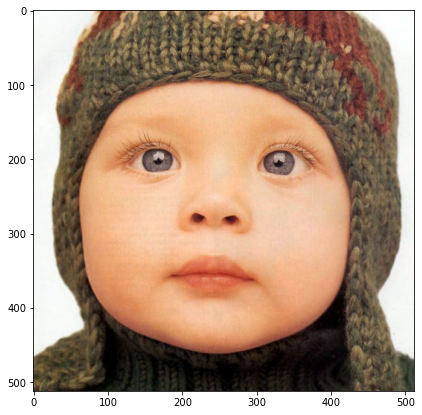

In [9]:
img_path = '/Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/HR/000000.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

In [8]:

dict_size   = 2048         # dictionary size
lmbd        = 0.1          # sparsity regularization
patch_size  = 3            # image patch size
nSmp        = 100000       # number of patches to sample
upscale     = 3            # upscaling factor


#train_img_path = 'data/train_hr/'   # Set your training images dir
train_img_path = '/Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/HR/'

# Randomly sample image patches
Xh, Xl = rnd_smp_patch(train_img_path, patch_size, nSmp, upscale)

 15%|█▍        | 6736/46196 [00:01<00:11, 3509.39it/s]


 57%|█████▋    | 26226/46196 [00:31<00:54, 369.14it/s]


 76%|███████▌  | 35071/46196 [01:01<00:44, 249.75it/s]


 91%|█████████ | 42026/46196 [01:32<00:18, 229.00it/s]


100%|██████████| 5/5 [02:18<00:00, 27.73s/it]


In [9]:
Xl.shape

(36, 99998)

In [10]:
Xh.shape

(9, 99998)

In [48]:

dict_size   = 2048         # dictionary size
lmbd        = 0.1          # sparsity regularization
patch_size  = 3            # image patch size
nSmp        = 100000       # number of patches to sample
upscale     = 3            # upscaling factor


#train_img_path = 'data/train_hr/'   # Set your training images dir
train_img_path = '/Users/hchoong/Desktop/eth/sa_a3nas/data/SR_testing_datasets/Set5/HR/'

# Randomly sample image patches
Xh, Xl = rnd_smp_patch(train_img_path, patch_size, nSmp, upscale)

# Prune patches with small variances
Xh, Xl = patch_pruning(Xh, Xl)
Xh = np.asfortranarray(Xh)
Xl = np.asfortranarray(Xl)

# Dictionary learning
Dh = trainDL(Xh, K=dict_size, lambda1=lmbd, iter=100)
Dl = trainDL(Xl, K=dict_size, lambda1=lmbd, iter=100)

print('finished dictionary learning')

# Saving dictionaries to files
with open('data/dicts/'+ 'Dh_' + str(dict_size) + '_US' + str(upscale) + '_L' + str(lmbd) + '_PS' + str(patch_size) + '_test' + '.pkl', 'wb') as f:
    pickle.dump(Dh, f, pickle.HIGHEST_PROTOCOL)

with open('data/dicts/'+ 'Dl_' + str(dict_size) + '_US' + str(upscale) + '_L' + str(lmbd) + '_PS' + str(patch_size) + '_test' + '.pkl', 'wb') as f:
    pickle.dump(Dl, f, pickle.HIGHEST_PROTOCOL)

 32%|███▏      | 14776/46196 [00:10<00:53, 591.44it/s]


 55%|█████▍    | 25367/46196 [00:40<01:12, 286.82it/s]


 72%|███████▏  | 33224/46196 [01:11<00:52, 248.54it/s]


 86%|████████▌ | 39828/46196 [01:42<00:37, 171.22it/s]


 98%|█████████▊| 45238/46196 [02:12<00:05, 174.40it/s]


100%|██████████| 5/5 [02:54<00:00, 34.90s/it]


In [53]:
Dh.shape

(9, 2048)

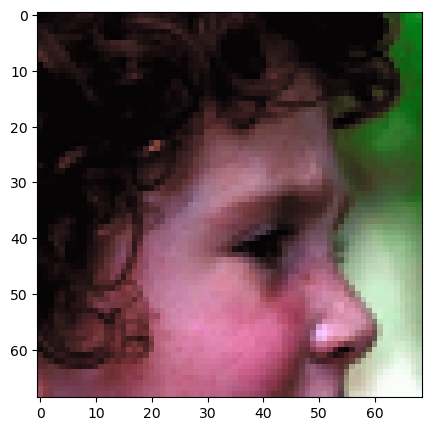

In [7]:
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/val_lr/000005.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

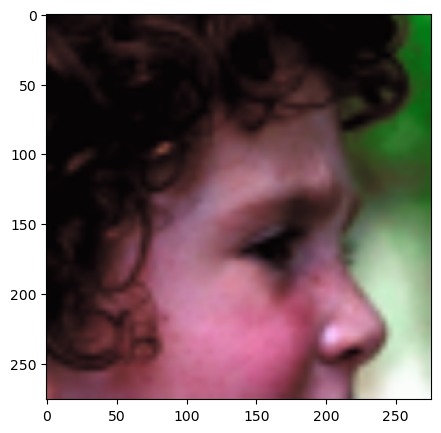

In [5]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/1bicubic.png'
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/1bicubic.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

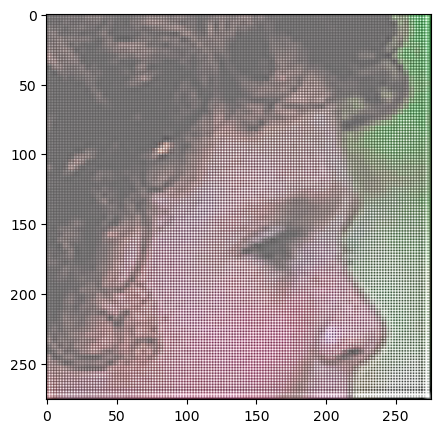

In [7]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/2SR.png'
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_58_23/2048_US3_L0.1_PS3_000005/2SR.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_11_16_53_15/2048_US3_L0.1_PS3_000005/2SR.png'


img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

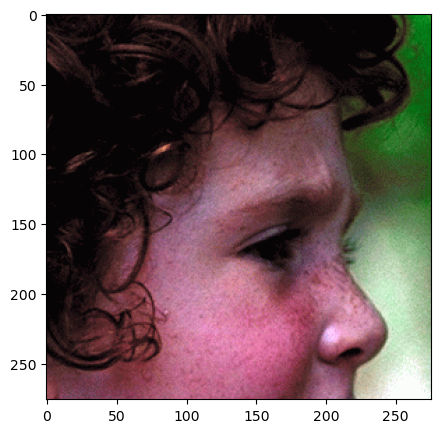

In [7]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/3HR.png'
img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/3HR.png'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

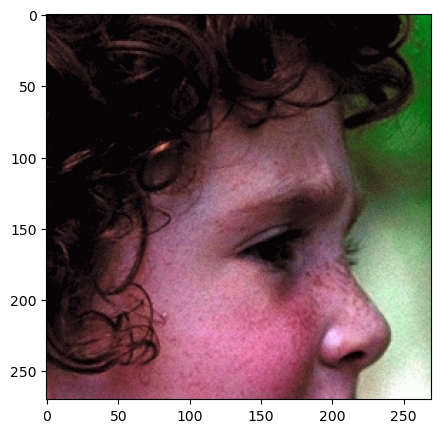

In [7]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/3HR.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/3HR.png'

img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/AplusCodes_SR/ResultsRGB-2022-10-11_16-10-30/face[1-Original].bmp'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()

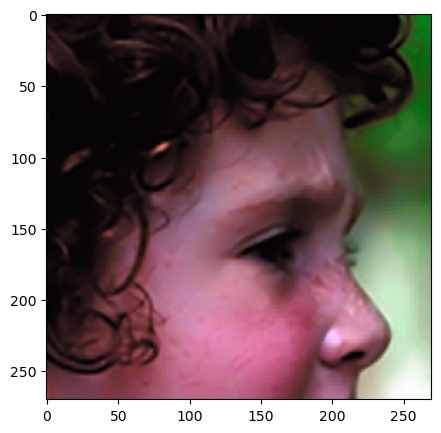

In [9]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/3HR.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/3HR.png'

img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/AplusCodes_SR/ResultsRGB-2022-10-11_16-10-30/face[3-Yang et al.].bmp'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()



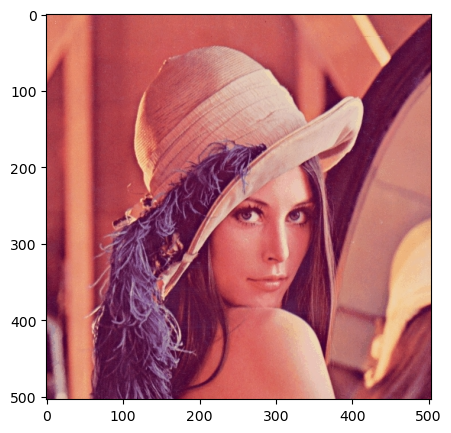

In [11]:


#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/3HR.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/3HR.png'

img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/AplusCodes_SR/ResultsRGB-2022-10-11_16-10-30/lenna[1-Original].bmp'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()







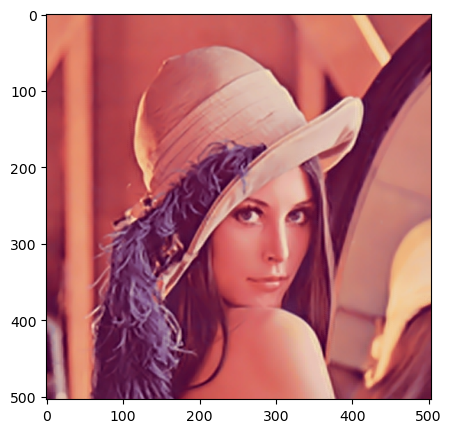

In [10]:
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_08_15_07_49/2048_US3_L0.1_PS3_000005/3HR.png'
#img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/ScSR/data/results/exp_2022_10_10_16_33_28/2048_US3_L0.1_PS3_000005/3HR.png'

img_path = '/scratch_net/kringel/hchoong/github/quantum-cv/AplusCodes_SR/ResultsRGB-2022-10-11_16-10-30/lenna[3-Yang et al.].bmp'

img = mpimg.imread(img_path)

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

imgplot = ax1.imshow(img)

plt.show()




